In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
from data.dataset import LidDrivenDataset
from torch.utils.data import DataLoader

# Data

For some reason the trained models had horrible performance before the neurips FM workshop submission. This notebook is to look through the data and loss function to see where the bug is.

### SDF dataset

In [4]:
train = LidDrivenDataset(file_path_x = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_train_x.npz',
                         file_path_y = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_train_y.npz',
                         equation = 'ns+ht',
                         data_type = 'field',
                         inputs = 'sdf'
                         )
test = LidDrivenDataset(file_path_x = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_test_x.npz',
                         file_path_y = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_test_y.npz',
                         equation = 'ns+ht',
                         data_type = 'field',
                         inputs = 'sdf'
                         )

print('train size:', len(train))
print('test size:', len(test))

train size: 800
test size: 190


In [5]:
sample = train[0]
x, y = sample

print('x:', x.shape)
print('y:', y.shape)

x: torch.Size([3, 512, 512])
y: torch.Size([4, 512, 512])


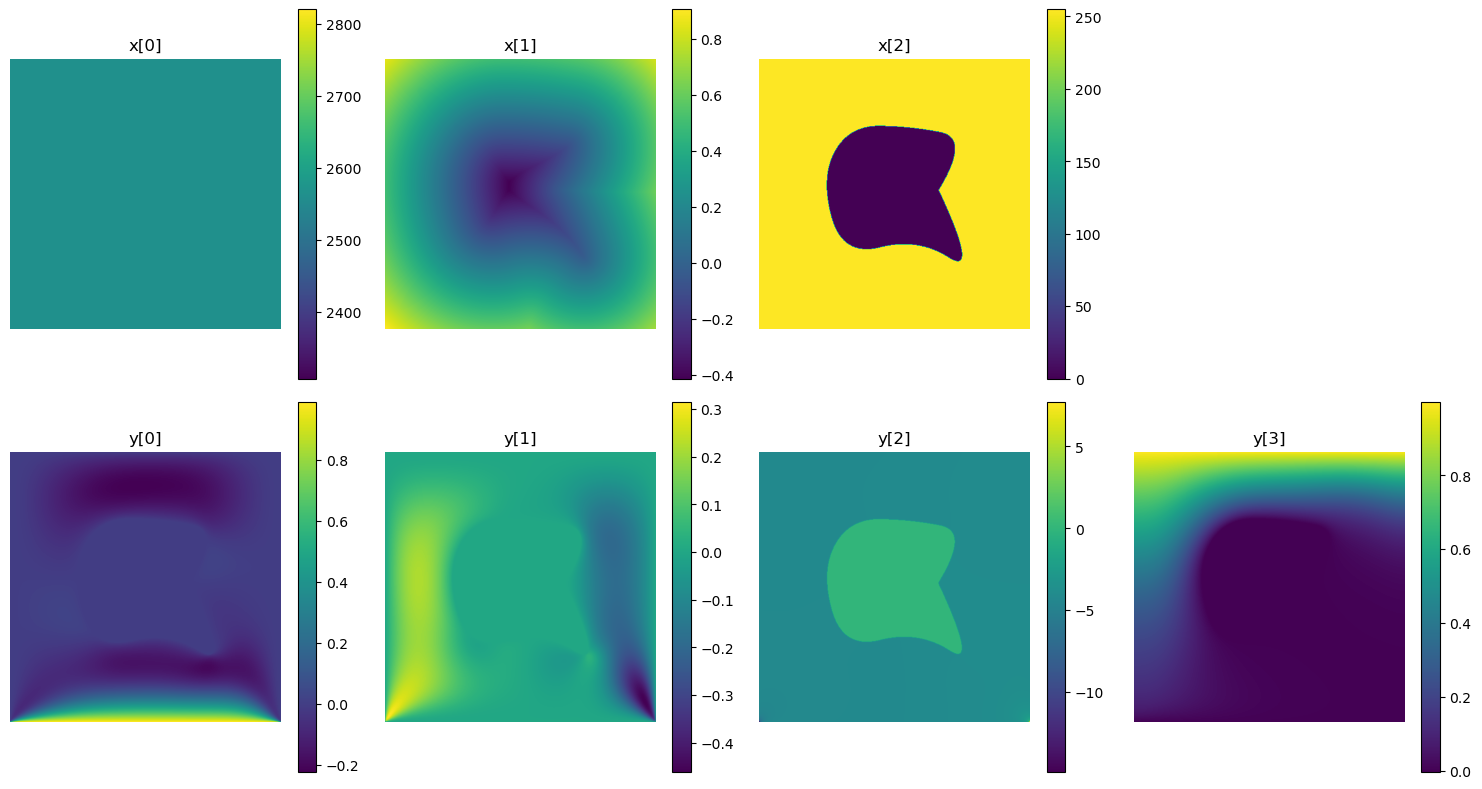

In [6]:
fig, axes = plt.subplots(2, max(x.size(0), y.size(0)), figsize=(15, 8))

# Plot the tensors from x in the first row
for i in range(x.size(0)):
    ax = axes[0, i]
    cax = ax.imshow(x[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'x[{i}]')
    ax.axis('off')

# Plot the tensors from y in the second row
for i in range(y.size(0)):
    ax = axes[1, i]
    cax = ax.imshow(y[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'y[{i}]')
    ax.axis('off')

# Hide any empty subplots if y has more tensors than x
if x.size(0) < y.size(0):
    for i in range(x.size(0), y.size(0)):
        axes[0, i].axis('off')

plt.tight_layout()
plt.show()


### Mask dataset

In [8]:
train = LidDrivenDataset(file_path_x = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_train_x.npz',
                         file_path_y = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_train_y.npz',
                         equation = 'ns+ht',
                         data_type = 'field',
                         inputs = 'mask'
                         )
test = LidDrivenDataset(file_path_x = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_test_x.npz',
                         file_path_y = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_test_y.npz',
                         equation = 'ns+ht',
                         data_type = 'field',
                         inputs = 'mask'
                         )

print('train size:', len(train))
print('test size:', len(test))


sample = train[0]
x, y = sample

print('x:', x.shape)
print('y:', y.shape)

train size: 800
test size: 190
x: torch.Size([3, 512, 512])
y: torch.Size([4, 512, 512])


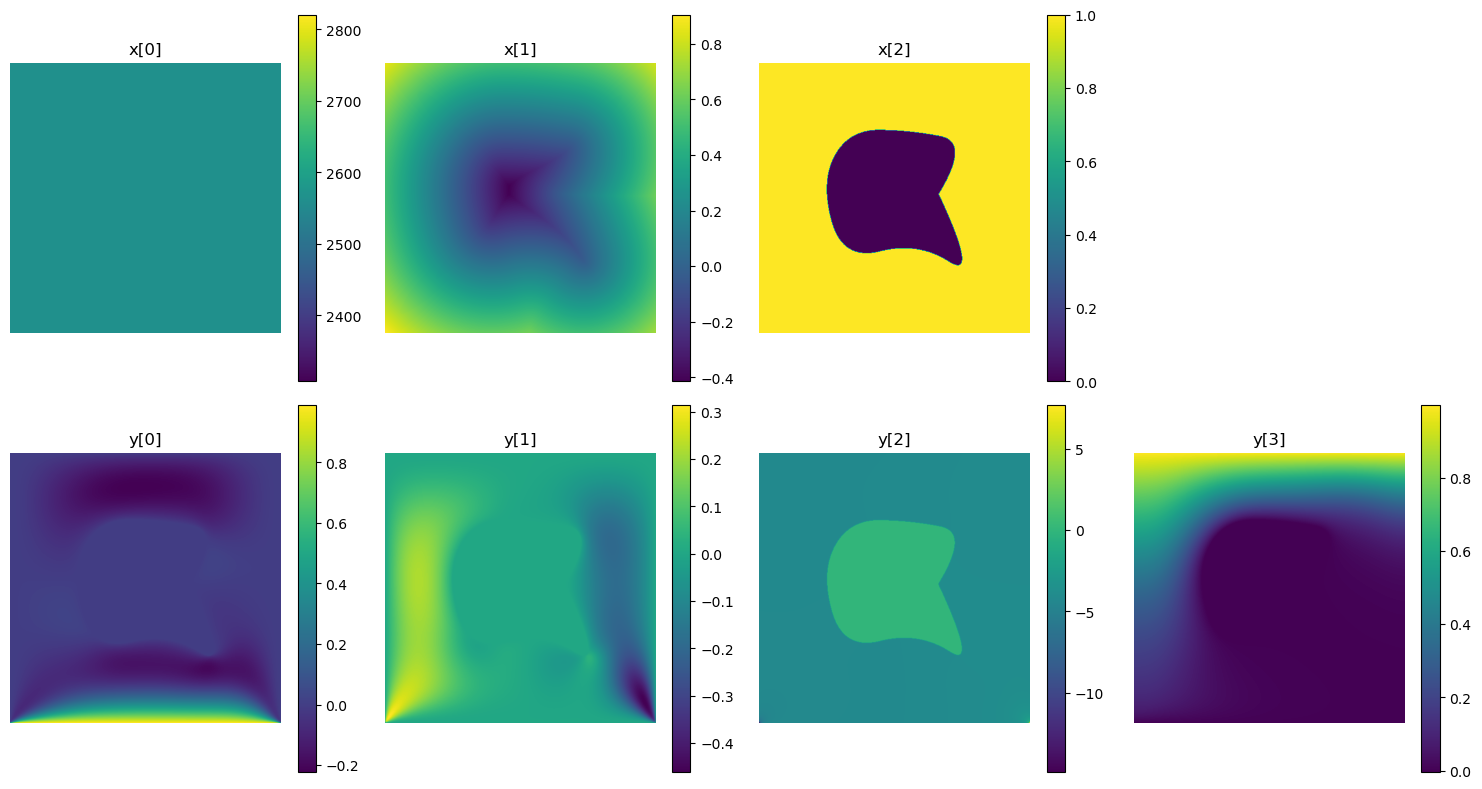

In [9]:
fig, axes = plt.subplots(2, max(x.size(0), y.size(0)), figsize=(15, 8))

# Plot the tensors from x in the first row
for i in range(x.size(0)):
    ax = axes[0, i]
    cax = ax.imshow(x[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'x[{i}]')
    ax.axis('off')

# Plot the tensors from y in the second row
for i in range(y.size(0)):
    ax = axes[1, i]
    cax = ax.imshow(y[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'y[{i}]')
    ax.axis('off')

# Hide any empty subplots if y has more tensors than x
if x.size(0) < y.size(0):
    for i in range(x.size(0), y.size(0)):
        axes[0, i].axis('off')

plt.tight_layout()
plt.show()


### Raw data

In [12]:
data_x = np.load('/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_train_x.npz')['data']
data_y = np.load('/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_train_y.npz')['data']

print('x:', data_x.shape)
print('y:', data_y.shape)

x: (800, 3, 512, 512)
y: (800, 7, 512, 512)


x: (3, 512, 512)
y: (4, 512, 512)


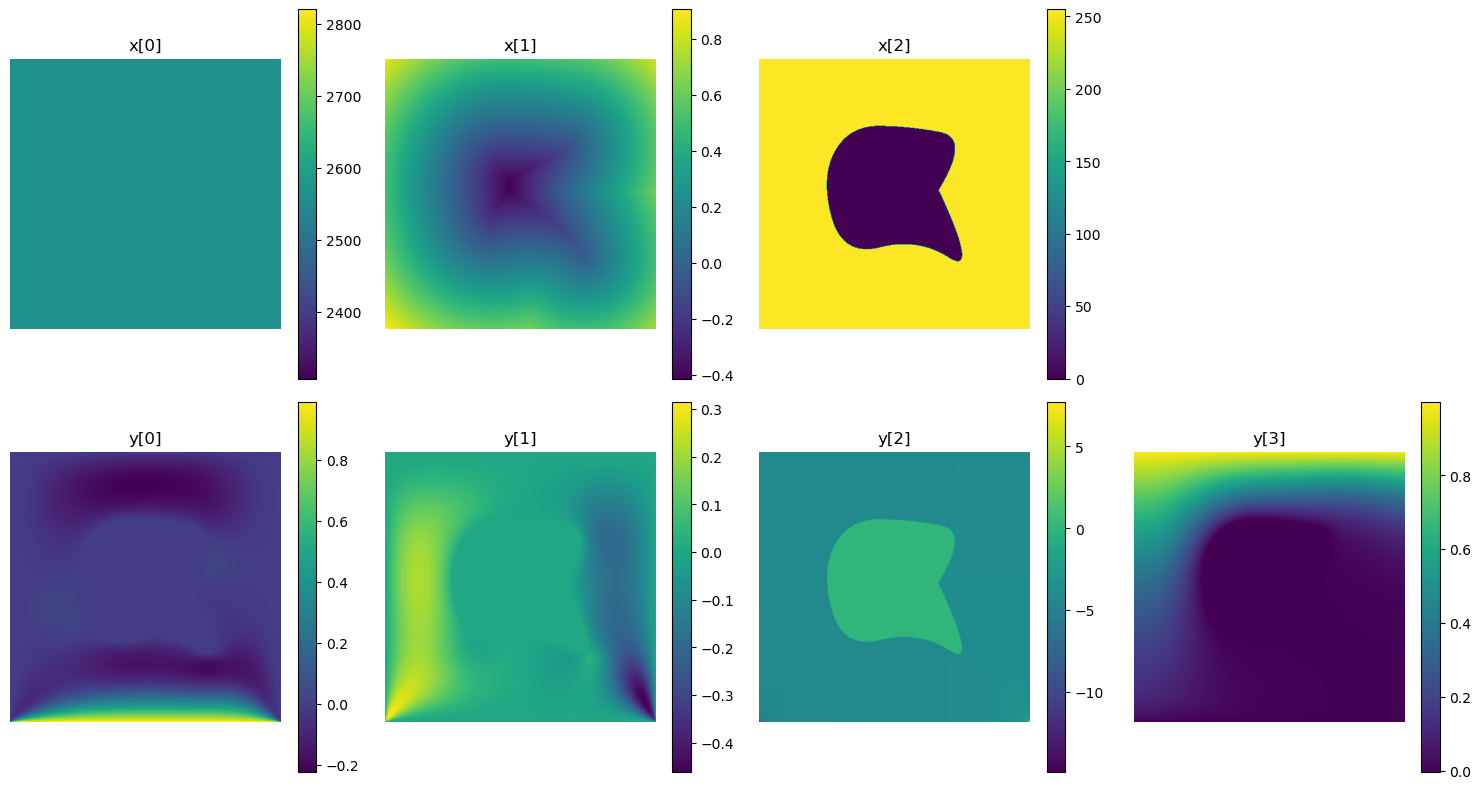

In [15]:
x = data_x[0]
y = data_y[0, :4, :, :]
print('x:', x.shape)
print('y:', y.shape)

fig, axes = plt.subplots(2, max(x.shape[0], y.shape[0]), figsize=(15, 8))

# Plot the tensors from x in the first row
for i in range(x.shape[0]):
    ax = axes[0, i]
    cax = ax.imshow(x[i], cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'x[{i}]')
    ax.axis('off')

# Plot the tensors from y in the second row
for i in range(y.shape[0]):
    ax = axes[1, i]
    cax = ax.imshow(y[i], cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'y[{i}]')
    ax.axis('off')

# Hide any empty subplots if y has more tensors than x
if x.shape[0] < y.shape[0]:
    for i in range(x.shape[0], y.shape[0]):
        axes[0, i].axis('off')

plt.tight_layout()
plt.show()



## Data after corrected dataset

### Mask

In [2]:
train = LidDrivenDataset(file_path_x = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_train_x.npz',
                         file_path_y = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_train_y.npz',
                         equation = 'ns+ht',
                         data_type = 'field',
                         inputs = 'mask'
                         )
test = LidDrivenDataset(file_path_x = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_test_x.npz',
                         file_path_y = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_test_y.npz',
                         equation = 'ns+ht',
                         data_type = 'field',
                         inputs = 'mask'
                         )

print('train size:', len(train))
print('test size:', len(test))


sample = train[0]
x, y = sample

print('x:', x.shape)
print('y:', y.shape)

train size: 800
test size: 190
x: torch.Size([2, 512, 512])
y: torch.Size([4, 512, 512])


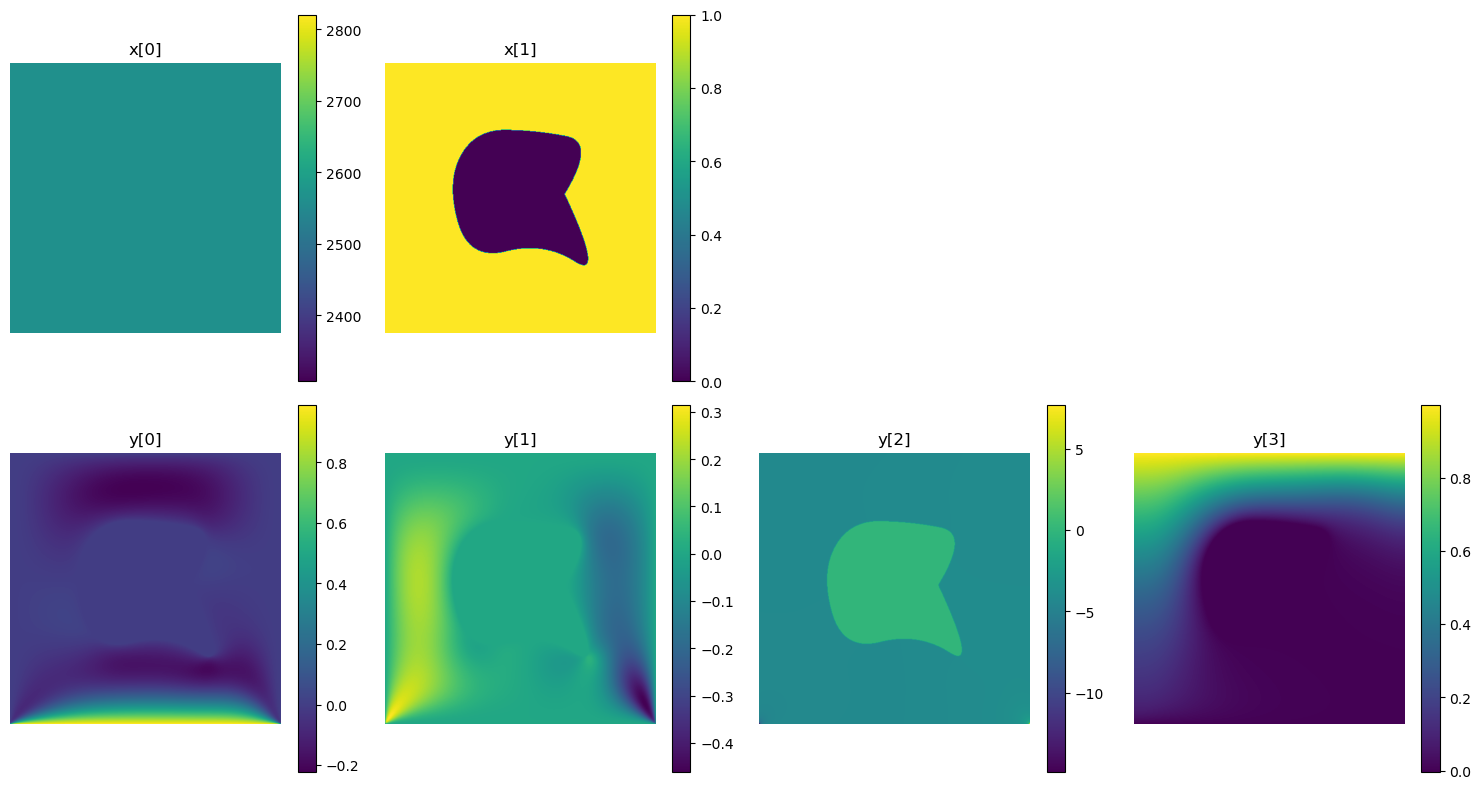

In [3]:
fig, axes = plt.subplots(2, max(x.size(0), y.size(0)), figsize=(15, 8))

# Plot the tensors from x in the first row
for i in range(x.size(0)):
    ax = axes[0, i]
    cax = ax.imshow(x[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'x[{i}]')
    ax.axis('off')

# Plot the tensors from y in the second row
for i in range(y.size(0)):
    ax = axes[1, i]
    cax = ax.imshow(y[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'y[{i}]')
    ax.axis('off')

# Hide any empty subplots if y has more tensors than x
if x.size(0) < y.size(0):
    for i in range(x.size(0), y.size(0)):
        axes[0, i].axis('off')

plt.tight_layout()
plt.show()


### SDF

train size: 800
test size: 190
x: torch.Size([2, 512, 512])
y: torch.Size([4, 512, 512])


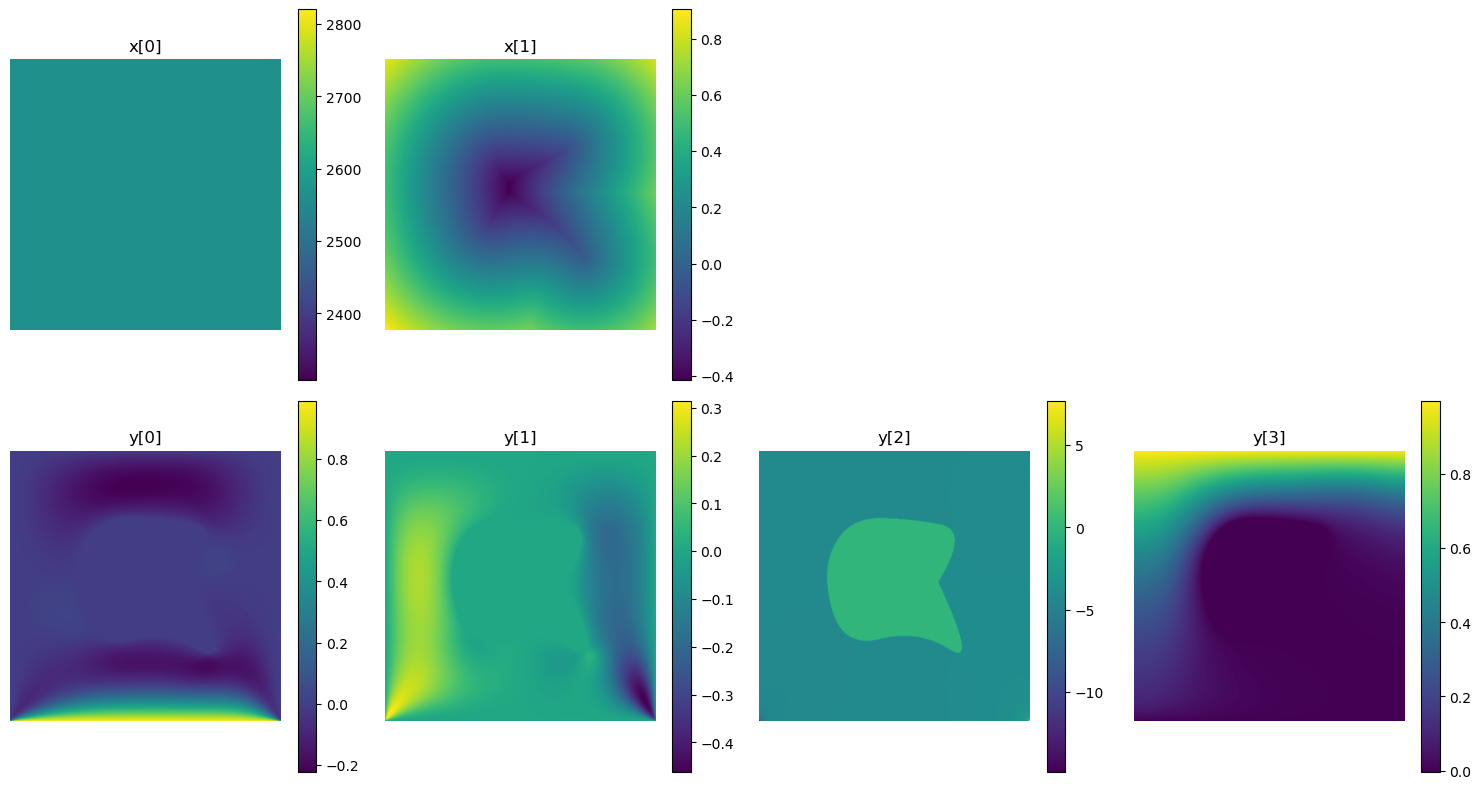

In [4]:
train = LidDrivenDataset(file_path_x = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_train_x.npz',
                         file_path_y = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_train_y.npz',
                         equation = 'ns+ht',
                         data_type = 'field',
                         inputs = 'sdf'
                         )
test = LidDrivenDataset(file_path_x = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_test_x.npz',
                         file_path_y = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_test_y.npz',
                         equation = 'ns+ht',
                         data_type = 'field',
                         inputs = 'sdf'
                         )

print('train size:', len(train))
print('test size:', len(test))


sample = train[0]
x, y = sample

print('x:', x.shape)
print('y:', y.shape)

fig, axes = plt.subplots(2, max(x.size(0), y.size(0)), figsize=(15, 8))

# Plot the tensors from x in the first row
for i in range(x.size(0)):
    ax = axes[0, i]
    cax = ax.imshow(x[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'x[{i}]')
    ax.axis('off')

# Plot the tensors from y in the second row
for i in range(y.size(0)):
    ax = axes[1, i]
    cax = ax.imshow(y[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'y[{i}]')
    ax.axis('off')

# Hide any empty subplots if y has more tensors than x
if x.size(0) < y.size(0):
    for i in range(x.size(0), y.size(0)):
        axes[0, i].axis('off')

plt.tight_layout()
plt.show()


# Loss - Applying object BC to field sol

### SDF dataset

In [5]:
train = LidDrivenDataset(file_path_x = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_train_x.npz',
                         file_path_y = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_train_y.npz',
                         equation = 'ns+ht',
                         data_type = 'field',
                         inputs = 'sdf'
                         )
test = LidDrivenDataset(file_path_x = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_test_x.npz',
                         file_path_y = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_test_y.npz',
                         equation = 'ns+ht',
                         data_type = 'field',
                         inputs = 'sdf'
                         )

print('train size:', len(train))
print('test size:', len(test))


sample = train[0]
x, y = sample

print('x:', x.shape)
print('y:', y.shape)



from einops import repeat
x = repeat(x, 'c h w -> b c h w', b=8)
y = repeat(y, 'c h w -> b c h w', b=8)
y_hat_og = torch.randn_like(y)
y_hat = y_hat_og.clone()
for i in range(y_hat.shape[1]):
    y_hat[:, i, :, :] = torch.where(x[:,-1,:,:] > 0.,
                                    y_hat[:,i,:,:],
                                    torch.zeros_like(y_hat[:,i,:,:].type_as(y_hat))
                                    )
    
    
print('x:', x.shape)
print('y:', y.shape)
print('y_hat:', y_hat.shape)
print('y_hat_og:', y_hat_og.shape)

x: torch.Size([8, 2, 512, 512])
y: torch.Size([8, 4, 512, 512])
y_hat: torch.Size([8, 4, 512, 512])
y_hat_og: torch.Size([8, 4, 512, 512])


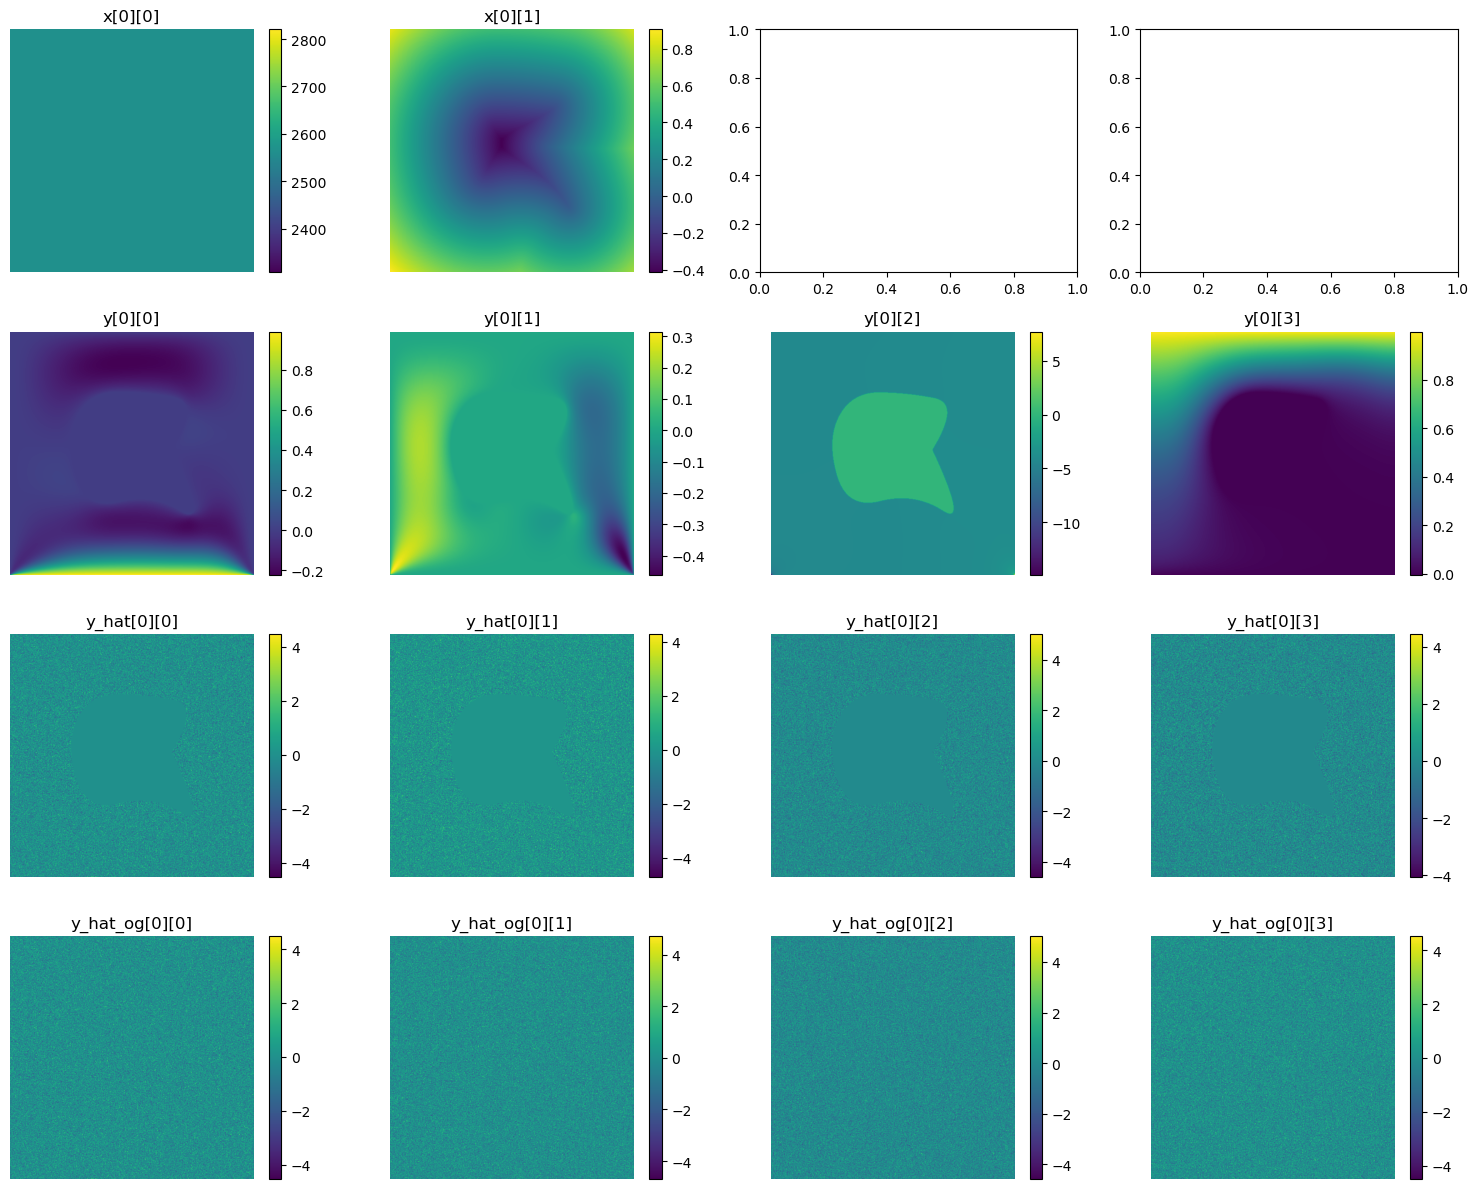

In [6]:
# Extract the first element along the batch dimension
x_first = x[0]
y_first = y[0]
y_hat_first = y_hat[0]
y_hat_og_first = y_hat_og[0]

# Create figure
fig, axes = plt.subplots(4, max(x_first.size(0), y_first.size(0)), figsize=(15, 12))

# Plot the tensors from x in the first row
for i in range(x_first.size(0)):
    ax = axes[0, i]
    cax = ax.imshow(x_first[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'x[0][{i}]')
    ax.axis('off')

# Plot the tensors from y in the second row
for i in range(y_first.size(0)):
    ax = axes[1, i]
    cax = ax.imshow(y_first[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'y[0][{i}]')
    ax.axis('off')

# Plot the tensors from y_hat in the third row
for i in range(y_hat_first.size(0)):
    ax = axes[2, i]
    cax = ax.imshow(y_hat_first[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'y_hat[0][{i}]')
    ax.axis('off')

# Plot the tensors from y_hat_og in the fourth row
for i in range(y_hat_og_first.size(0)):
    ax = axes[3, i]
    cax = ax.imshow(y_hat_og_first[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'y_hat_og[0][{i}]')
    ax.axis('off')

plt.tight_layout()
plt.show()


### Mask data

train size: 800
test size: 190
x: torch.Size([2, 512, 512])
y: torch.Size([4, 512, 512])
x: torch.Size([8, 2, 512, 512])
y: torch.Size([8, 4, 512, 512])
y_hat: torch.Size([8, 4, 512, 512])
y_hat_og: torch.Size([8, 4, 512, 512])


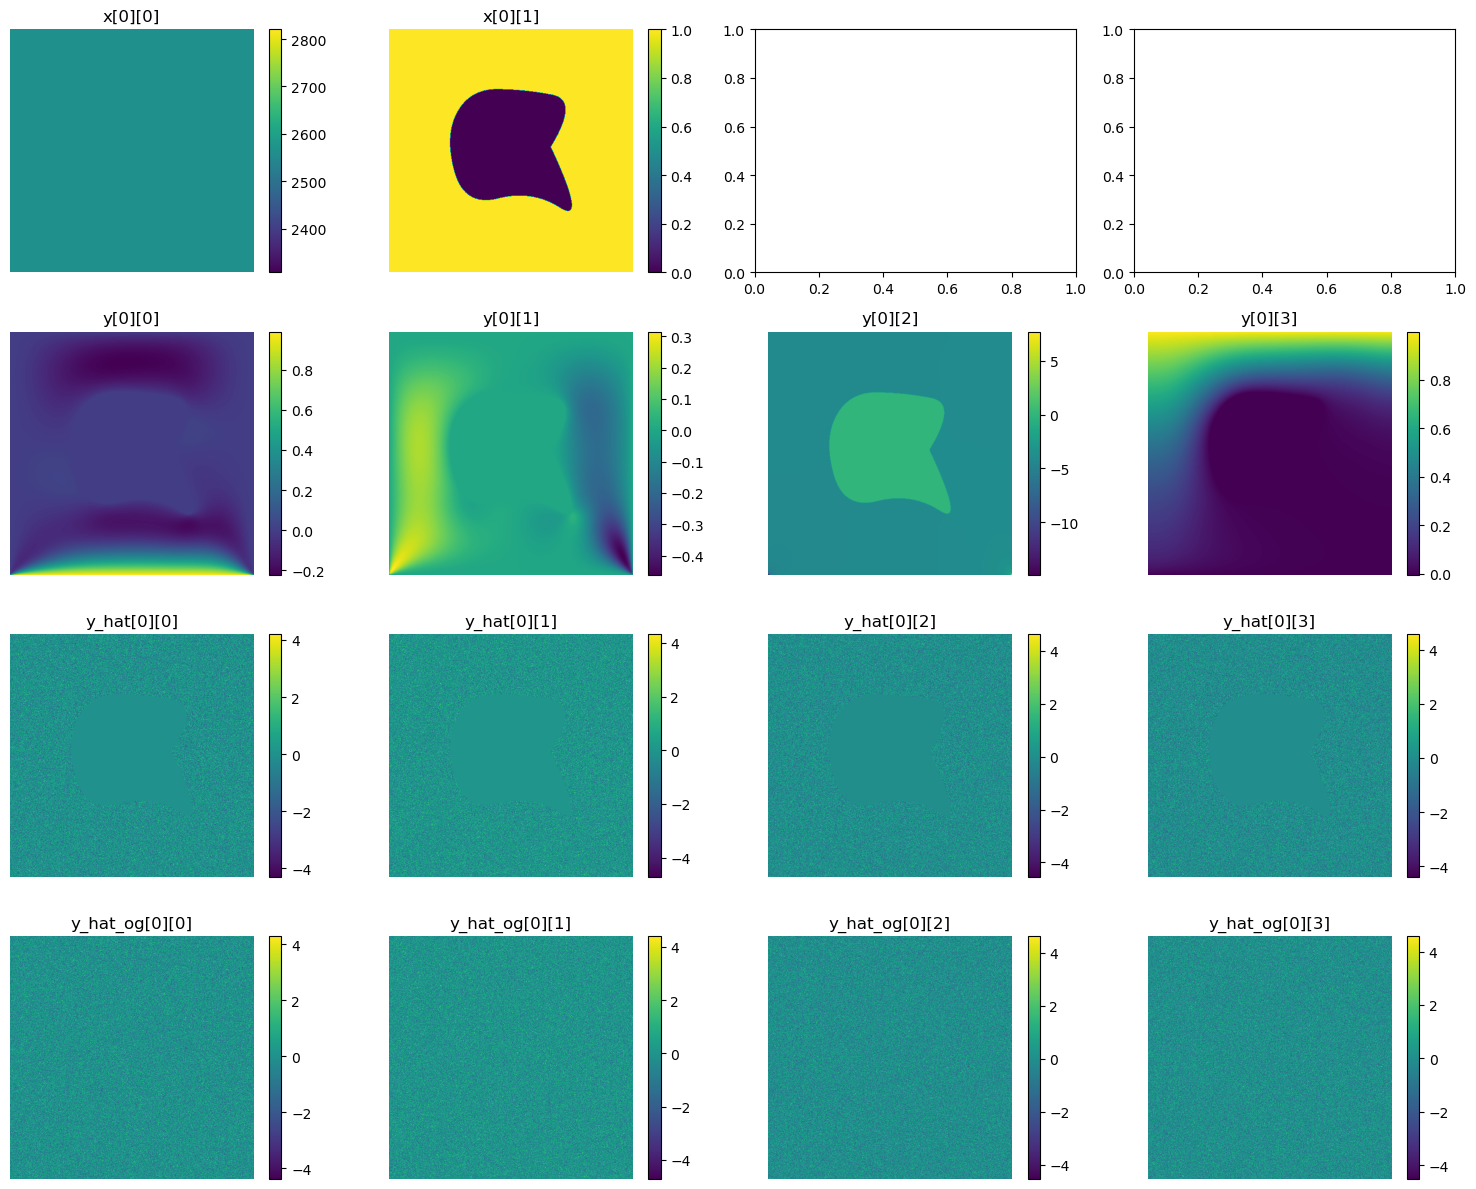

In [7]:
train = LidDrivenDataset(file_path_x = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_train_x.npz',
                         file_path_y = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_train_y.npz',
                         equation = 'ns+ht',
                         data_type = 'field',
                         inputs = 'mask'
                         )
test = LidDrivenDataset(file_path_x = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_test_x.npz',
                         file_path_y = '/home/edherron/pdes/data/NSHT_SteadyState/data/nurbs/easy/nurbs_ldc_test_y.npz',
                         equation = 'ns+ht',
                         data_type = 'field',
                         inputs = 'mask'
                         )

print('train size:', len(train))
print('test size:', len(test))


sample = train[0]
x, y = sample

print('x:', x.shape)
print('y:', y.shape)



from einops import repeat
x = repeat(x, 'c h w -> b c h w', b=8)
y = repeat(y, 'c h w -> b c h w', b=8)
y_hat_og = torch.randn_like(y)
y_hat = y_hat_og.clone()
for i in range(y_hat.shape[1]):
    y_hat[:, i, :, :] = torch.where(x[:,-1,:,:] > 0.,
                                    y_hat[:,i,:,:],
                                    torch.zeros_like(y_hat[:,i,:,:].type_as(y_hat))
                                    )
    
    
print('x:', x.shape)
print('y:', y.shape)
print('y_hat:', y_hat.shape)
print('y_hat_og:', y_hat_og.shape)

# Extract the first element along the batch dimension
x_first = x[0]
y_first = y[0]
y_hat_first = y_hat[0]
y_hat_og_first = y_hat_og[0]

# Create figure
fig, axes = plt.subplots(4, max(x_first.size(0), y_first.size(0)), figsize=(15, 12))

# Plot the tensors from x in the first row
for i in range(x_first.size(0)):
    ax = axes[0, i]
    cax = ax.imshow(x_first[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'x[0][{i}]')
    ax.axis('off')

# Plot the tensors from y in the second row
for i in range(y_first.size(0)):
    ax = axes[1, i]
    cax = ax.imshow(y_first[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'y[0][{i}]')
    ax.axis('off')

# Plot the tensors from y_hat in the third row
for i in range(y_hat_first.size(0)):
    ax = axes[2, i]
    cax = ax.imshow(y_hat_first[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'y_hat[0][{i}]')
    ax.axis('off')

# Plot the tensors from y_hat_og in the fourth row
for i in range(y_hat_og_first.size(0)):
    ax = axes[3, i]
    cax = ax.imshow(y_hat_og_first[i].numpy(), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'y_hat_og[0][{i}]')
    ax.axis('off')

plt.tight_layout()
plt.show()
